In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
coln = ['Pregnancies','Age','Insulin','BloodPressure']
f_cols = ['Glucose']
X = data[f_cols]
y = data.Outcome

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [7]:
logreg = LogisticRegression(random_state = 16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

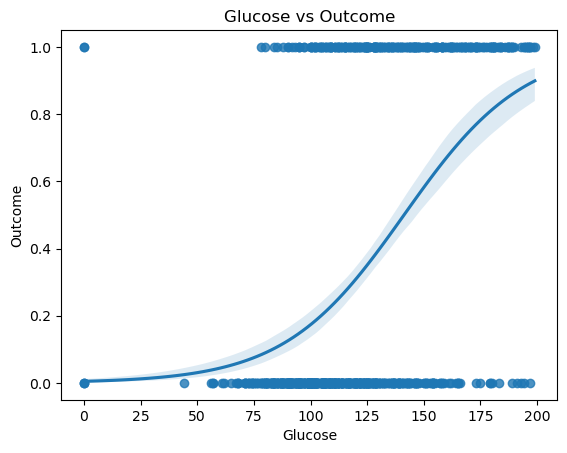

In [8]:
sns.regplot(x="Glucose", y="Outcome", data=data, logistic=True)
plt.title("Glucose vs Outcome")
plt.xlabel("Glucose")
plt.ylabel("Outcome")
plt.show()

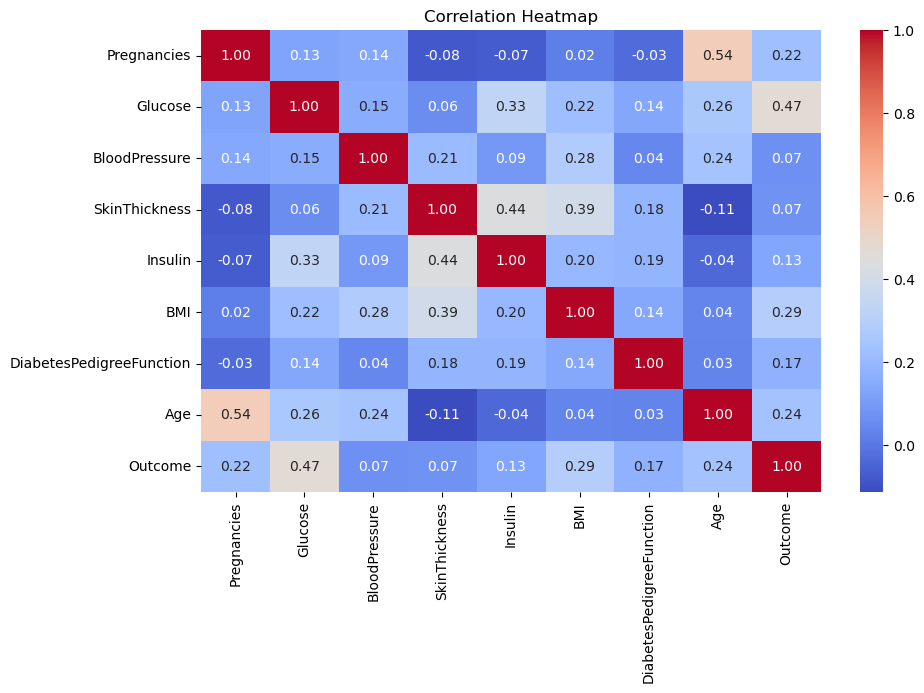

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


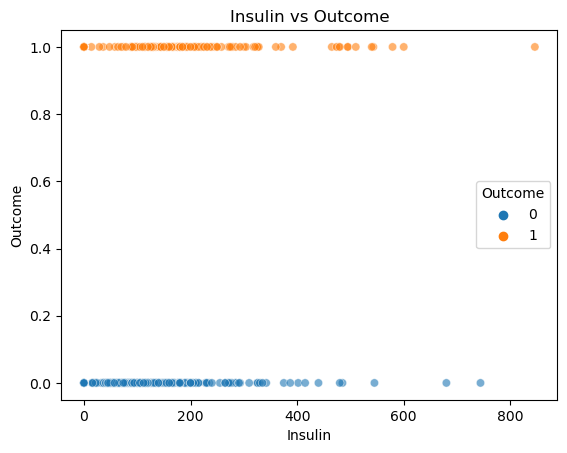

In [12]:
sns.scatterplot(x="Insulin", y="Outcome", data=data, hue="Outcome", alpha=0.6)
plt.title("Insulin vs Outcome")
plt.xlabel("Insulin")
plt.ylabel("Outcome")
plt.show()


C:\Users\ishwa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


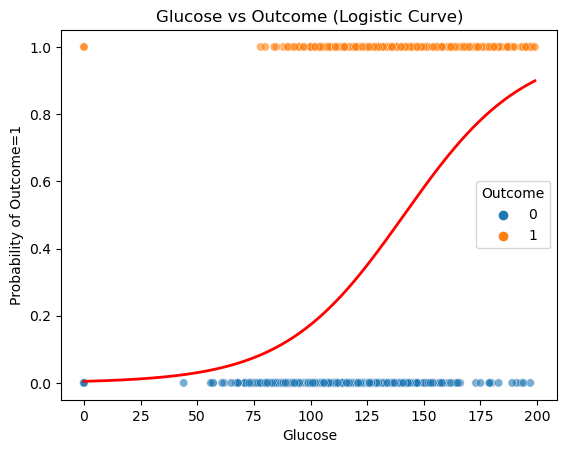

In [23]:
X = data[['Glucose']]
y = data['Outcome']

logreg.fit(X, y)

x_range = np.linspace(X.min(), X.max(), 300).reshape(-1,1)
y_prob = logreg.predict_proba(x_range)[:,1]

sns.scatterplot(x="Glucose", y="Outcome", data=data, hue="Outcome", alpha=0.6)
plt.plot(x_range, y_prob, color="red", linewidth=2)

plt.title("Glucose vs Outcome (Logistic Curve)")
plt.xlabel("Glucose")
plt.ylabel("Probability of Outcome=1")
plt.show()


In [24]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[123,   2],
       [ 65,   2]], dtype=int64)

In [32]:
from sklearn import metrics

TP, FN, FP, TN = metrics.confusion_matrix(y_test, y_pred).ravel()

accuracy  = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall    = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")


Accuracy: 0.651
Precision: 0.654
Recall: 0.984
F1-score: 0.786


In [31]:
TN,

123